In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'    

In [2]:
data = np.load("06_solve_v_by_disp_3.npz")

In [3]:
list(data.keys())

['data', 'k', 'beta']

In [4]:
data_pt = data["data"].reshape((51,51,2,2))

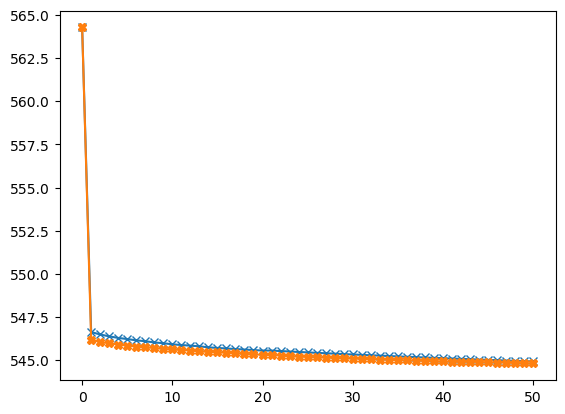

In [5]:
plt.plot(data_pt[0,:,0,0].transpose(), "x-")
plt.plot(data_pt[0,:,1,0].transpose(), "X-")



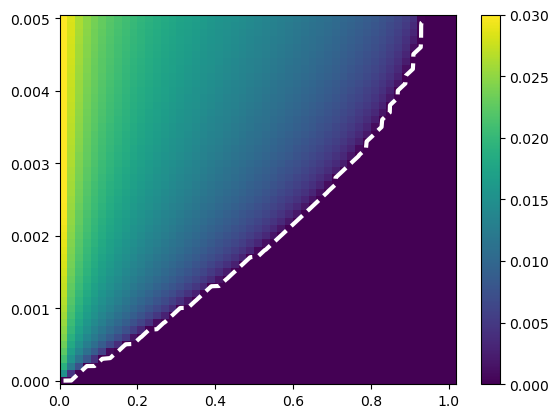

In [6]:
plt.pcolormesh(data["k"], data["beta"], data_pt[:,:,1,1].transpose(), vmin=0,  vmax=0.03)
plt.colorbar()
plt.contour(data["k"], data["beta"], data_pt[:,:,1,1].transpose(), levels=[0.0001], colors="white", linewidths=(3,), linestyles="dashed")

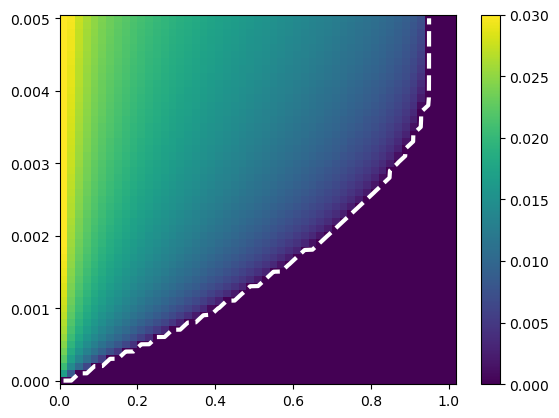

In [7]:
plt.pcolormesh(data["k"], data["beta"], data_pt[:,:,0,1].transpose(), vmin=0,  vmax=0.03)
plt.colorbar()
plt.contour(data["k"], data["beta"], data_pt[:,:,0,1].transpose(), levels=[0.0001], colors="white", linewidths=(3,), linestyles="dashed")

In [8]:
data_sim = np.load("07_output_1.npz")

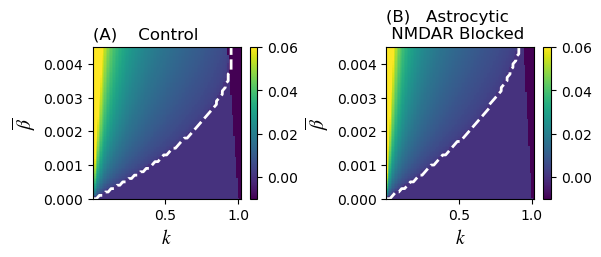

In [9]:
data_sim_pt = data_sim["data"].reshape((101,101,2))

fig, ax = plt.subplots(1,2,figsize=(15/2.525, 6.35/2.525))

plot1 = ax[0].pcolormesh(data_sim["k"], data_sim["beta"], data_sim_pt[:,:,0].transpose(), vmin = -0.01,vmax=0.06)
plt.colorbar(plot1)
ax[0].contour(data["k"], data["beta"], data_pt[:,:,0,1].transpose(), levels=[0.00001], colors="white", linewidths=(2,), linestyles="dashed")
ax[0].set_title('(A)    Control', loc="left")

plot2 = ax[1].pcolormesh(data_sim["k"], data_sim["beta"], data_sim_pt[:,:,1].transpose(), vmin = -0.01,vmax=0.06)
plt.colorbar(plot2)
ax[1].contour(data["k"], data["beta"], data_pt[:,:,1,1].transpose(), levels=[0.00001], colors="white", linewidths=(2,), linestyles="dashed")
ax[1].set_title('(B)   Astrocytic\n NMDAR Blocked', loc="left")

for ax_t in ax:
    ax_t.set_xlabel('$k$', fontsize=14)
    ax_t.set_ylabel(r'$\overline{\beta}$', fontsize=14)
    ax_t.set_ylim(0,0.0045)

plt.tight_layout(pad=0.5)

plt.savefig("Figure_03AB.pdf")

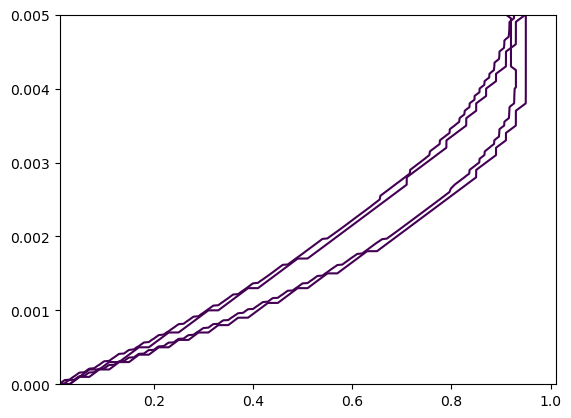

In [10]:
cntr1 = plt.contour(data["k"], data["beta"], data_pt[:,:,0,1].transpose(), levels=[0.00001])
cntr2 = plt.contour(data["k"], data["beta"], data_pt[:,:,1,1].transpose(), levels=[0.00001])

cntr1_sim = plt.contour(data_sim["k"], data_sim["beta"], data_sim_pt[:,:,0].transpose(), levels=[0.001])
cntr2_sim = plt.contour(data_sim["k"], data_sim["beta"], data_sim_pt[:,:,1].transpose(), levels=[0.001])
plt.show()
path1 = cntr1.get_paths()[0].vertices
path2 = cntr2.get_paths()[0].vertices
path1_sim = cntr1_sim.get_paths()[0].vertices
path2_sim = cntr2_sim.get_paths()[0].vertices

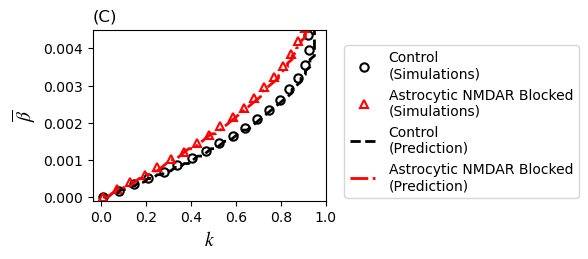

In [11]:
fig, ax = plt.subplots(1,1,figsize=(15/2.525, 6.4/2.525))


ax.plot(path1_sim[::10,0], path1_sim[::10,1], "ko", mfc="none", markeredgewidth=1.5, label="Control\n(Simulations)")
ax.plot(path2_sim[::10,0], path2_sim[::10,1], "r^", mfc="none", markeredgewidth=1.5, label="Astrocytic NMDAR Blocked\n(Simulations)")

ax.plot(path1[:,0], path1[:,1], "k--", linewidth=2, label="Control\n(Prediction)")
ax.plot(path2[:,0], path2[:,1], "r-.", linewidth=2, label="Astrocytic NMDAR Blocked\n(Prediction)")


ax.set_title('(C)', loc="left")

ax.set_xlabel(r'$k$', fontsize=14)
ax.set_ylabel(r'$\overline{\beta}$', fontsize=14)

ax.set_ylim(-0.0001,0.0045)

ax.set_xticks(np.arange(0,1.01,0.2))

plt.legend(loc="upper left", bbox_to_anchor=(1.05, 0.95))
plt.tight_layout(pad=0.5)

plt.savefig("Figure_03C.pdf")

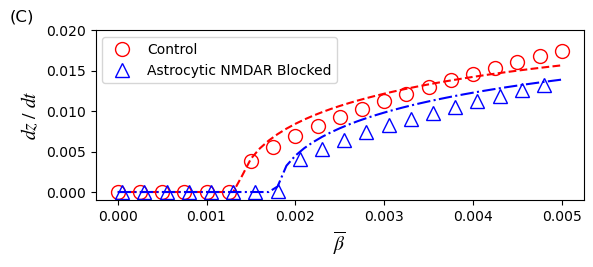

In [16]:
fig, ax = plt.subplots(figsize=(15/2.525, 7/2.525))

ax.plot(data["beta"], data_pt[25,:,0,1].transpose(), "r--")
ax.plot(data_sim["beta"][::5], data_sim_pt[50,::5,0].transpose(), "ro", mfc="none", ms=10, label="Control")

ax.plot(data["beta"], data_pt[25,:,1,1].transpose(), "b-.")
ax.plot(data_sim["beta"][1::5], data_sim_pt[50,1::5,1].transpose(), "b^", mfc="none", ms=10, label="Astrocytic NMDAR Blocked")

ax.set_xticks(np.arange(0,0.0051, 0.001))
ax.set_yticks(np.arange(0,0.0201, 0.005))

ax.set_ylim((-0.001,0.02))

ax.set_xlabel(r'$\overline{\beta}$', fontsize=14)
ax.set_ylabel(r'$dz~/~dt$', fontsize=14)

ax.set_title("(C)", x=-0.15)

ax.legend()

plt.tight_layout()

plt.savefig("Figure_04C.pdf")